In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [76]:
titanic_df = pd.read_csv('/content/train.csv')
test= pd.read_csv('/content/test.csv')


In [77]:
test_df = test.drop(columns = 'Cabin', axis = 1)
test_df['Age'].fillna(test_df['Age'].mean(), inplace = True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace = True)
test_df.replace({'Sex' : {'male' : 0, 'female' : 1}, 'Embarked' : {'S' : 0, 'C' : 1, 'Q' : 2}}, inplace = True)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


In [78]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
titanic_df.shape

(891, 12)

In [80]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [81]:
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [82]:
# handling missing values
df = titanic_df.drop(columns = 'Cabin', axis = 1)

In [83]:
# replacing missing age values with the mean value
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [84]:
# replacing the missing embarked values by the most repeated value
print(df['Embarked'].mode()[0])
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

S


In [85]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [86]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [87]:
# finding no. of people that survived
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [88]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

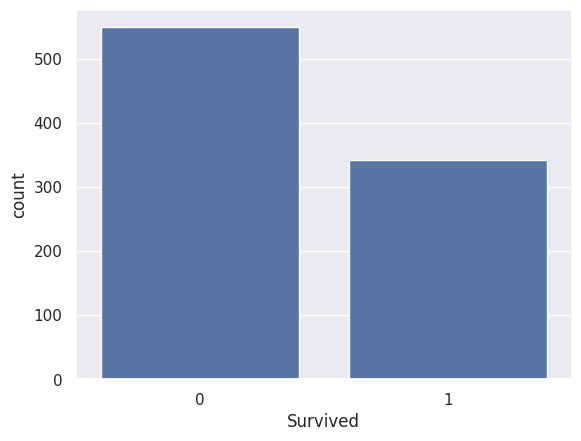

In [89]:
# making a count plot for the 'survived' column
sns.countplot(x = 'Survived', data = df)

<Axes: xlabel='Sex', ylabel='count'>

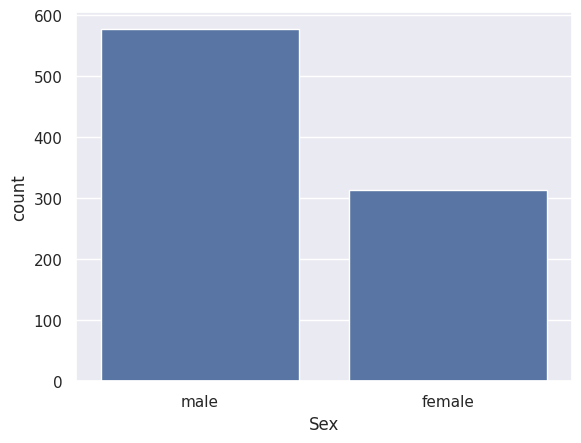

In [90]:
# making a count plot for the 'sex' column
sns.countplot(x = 'Sex', data = df)

<Axes: xlabel='Sex', ylabel='count'>

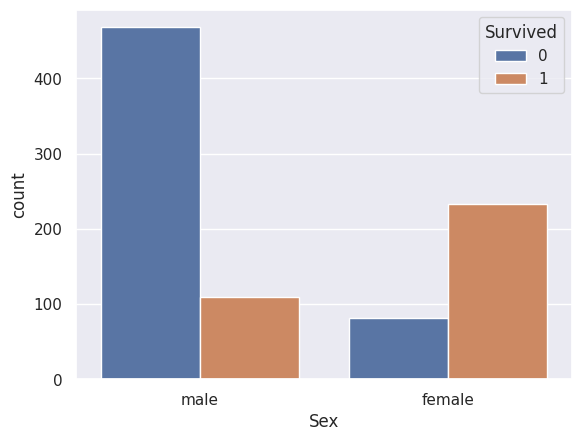

In [91]:
sns.countplot(x = 'Sex', hue = 'Survived', data = df)

<Axes: xlabel='Pclass', ylabel='count'>

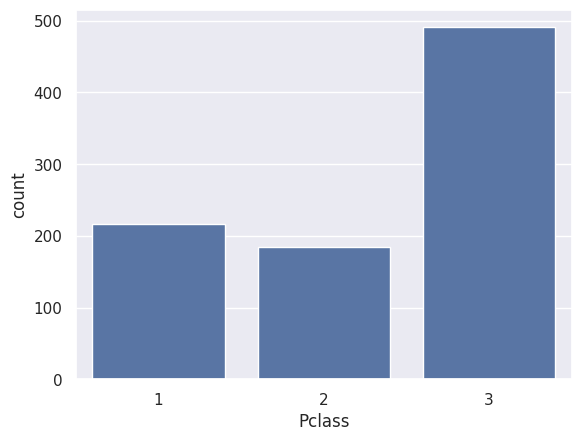

In [92]:
# making a count plot for the 'pclass' column
sns.countplot(x = 'Pclass', data = df)

<Axes: xlabel='Pclass', ylabel='count'>

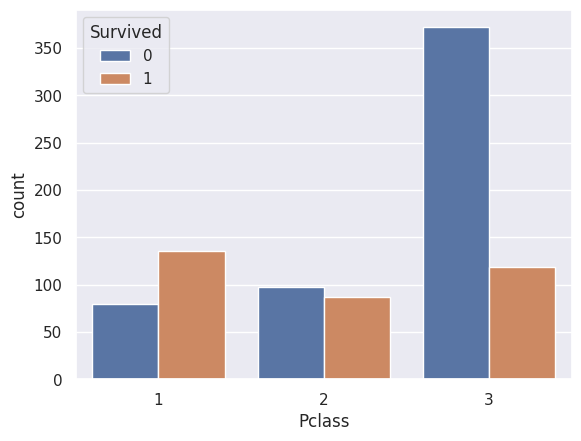

In [93]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = df)

<Axes: xlabel='Embarked', ylabel='count'>

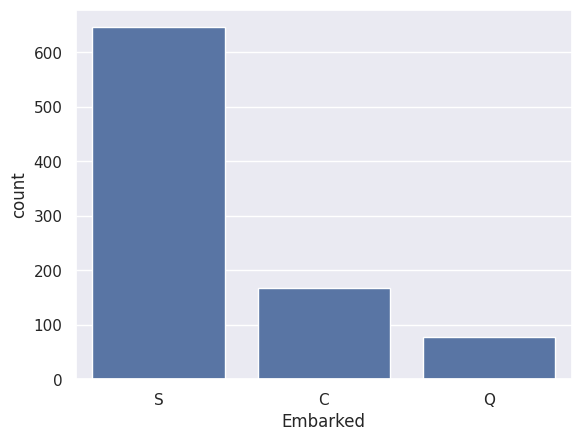

In [94]:
# making a count plot for the 'pclass' column
sns.countplot(x = 'Embarked', data = df)

<Axes: xlabel='Embarked', ylabel='count'>

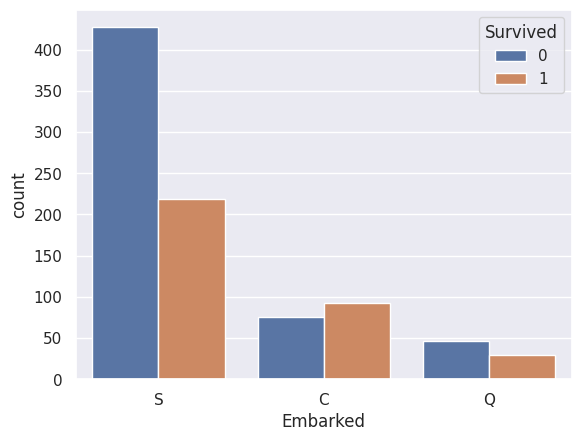

In [95]:
sns.countplot(x = 'Embarked', hue = 'Survived', data = df)

In [96]:
# encoding categorical columns
# male = 0, female = 1

df.replace({'Sex' : {'male' : 0, 'female' : 1}, 'Embarked' : {'S' : 0, 'C' : 1, 'Q' : 2}}, inplace = True)


In [97]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [98]:
# separating features and targets
X = df.drop(columns = ['PassengerId', 'Name', 'Ticket','Survived'], axis = 1)
Y = df['Survived']

In [99]:
# train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [100]:
# model training
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [101]:
# model evaluation
X_train_pred = model.predict(X_train)
print(X_train_pred)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [102]:
# accuracy on train data
training_data_accuracy = accuracy_score(Y_train, X_train_pred)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8075842696629213


In [103]:
# accuracy on test data
X_test_pred = model.predict(X_test)
print(X_test_pred)
test_data_accuracy = accuracy_score(Y_test, X_test_pred)
print('Accuracy score of test data : ', test_data_accuracy)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]
Accuracy score of test data :  0.7821229050279329


In [104]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Step 1: Prepare training data
X_train = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)  # Drop unnecessary columns
Y_train = df['Survived']  # Target variable

# Step 2: Impute missing values in training data
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)  # Apply imputation to training data

# Step 3: Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Scale the training data

# Step 4: Train logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Step 5: Prepare the test data
X_test = test_df.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1)  # Drop unnecessary columns
X_test = X_test.reindex(columns=df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived']).columns, fill_value=0)  # Ensure same columns as training set

# Step 6: Impute missing values and scale test data
X_test_filled = imputer.transform(X_test)  # Apply imputation to test data
X_test_scaled = scaler.transform(X_test_filled)  # Scale test data

# Step 7: Make predictions on the test set
predictions = model.predict(X_test_scaled)  # Predict survival (0 or 1) for the test set

# Step 8: Create a DataFrame with PassengerId and Survived
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],  # Use PassengerId from the original test_df
    'Survived': predictions  # Use model predictions
})

# Step 9: Save the submission file to CSV
submission.to_csv('submission.csv', index=False)  # Do not include the index in the CSV file

print("Submission file 'submission.csv' created successfully.")


Submission file 'submission.csv' created successfully.
